# Smart Home Appliance Usage Forecasting
## 01 - Data Ingestion & Exploratory Data Analysis (EDA)

This notebook covers data loading, initial exploration, and basic visualizations for the synthetic IoT appliance usage dataset.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading

In [2]:
# Load the synthetic IoT logs
df = pd.read_csv('../data/raw/synthetic_iot_logs.csv', parse_dates=['timestamp'])
df.head()

,timestamp,appliance_id,appliance_name,usage,user_id
0,2025-05-28 23:58:21.197625,1,Air Conditioner,0.678,101
1,2025-05-29 00:13:21.197625,1,Air Conditioner,0.201,101
2,2025-05-29 00:28:21.197625,1,Air Conditioner,0.099,101
3,2025-05-29 00:43:21.197625,1,Air Conditioner,0.142,101
4,2025-05-29 00:58:21.197625,1,Air Conditioner,0.054,101


## Initial Data Exploration

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17286 entries, 0 to 17285
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       17286 non-null  datetime64[ns]
 1   appliance_id    17286 non-null  int64         
 2   appliance_name  17286 non-null  object        
 3   usage           17286 non-null  float64       
 4   user_id         17286 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 675.4+ KB


In [4]:
# Descriptive statistics
df.describe()

,timestamp,appliance_id,usage,user_id
count,17286,17286.00000,17286.000000,17286.000000
mean,2025-06-12 23:58:21.197624832,2.00000,0.162859,101.500000
min,2025-05-28 23:58:21.197625,1.00000,0.000000,101.000000
25%,2025-06-05 11:58:21.197625088,1.00000,0.000000,101.000000
50%,2025-06-12 23:58:21.197625088,2.00000,0.078000,101.500000
75%,2025-06-20 11:58:21.197625088,3.00000,0.131000,102.000000
max,2025-06-27 23:58:21.197625,3.00000,0.980000,102.000000
std,NaN,0.81652,0.227242,0.500014


In [5]:
# Check for missing values
df.isnull().sum()

timestamp         0
appliance_id      0
appliance_name    0
usage             0
user_id           0
dtype: int64

## Basic Visualizations

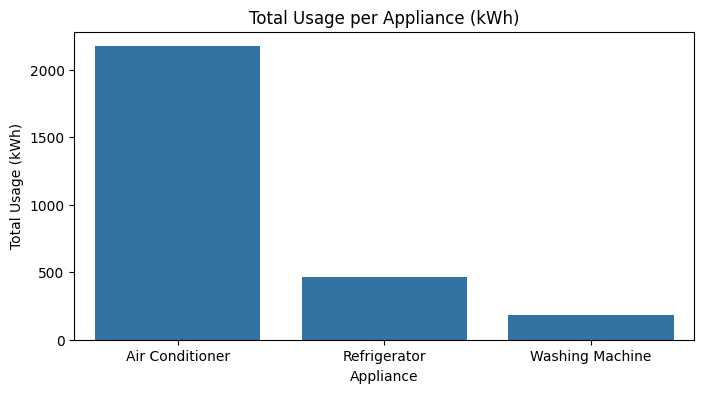

In [6]:
# Plot total usage per appliance
plt.figure(figsize=(8,4))
sns.barplot(x='appliance_name', y='usage', data=df.groupby('appliance_name')['usage'].sum().reset_index())
plt.title('Total Usage per Appliance (kWh)')
plt.ylabel('Total Usage (kWh)')
plt.xlabel('Appliance')
plt.show()

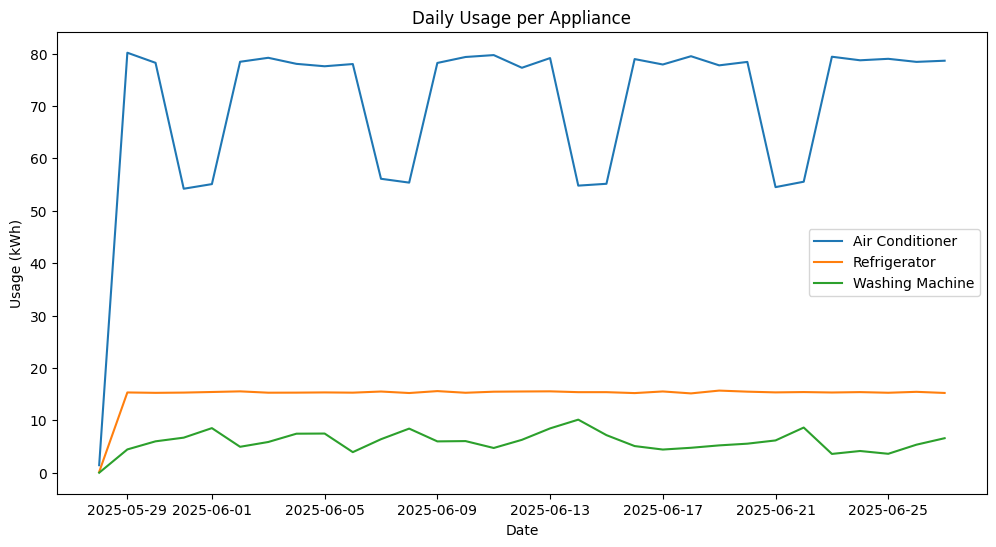

In [7]:
# Time series plot for each appliance
plt.figure(figsize=(12,6))
for name, group in df.groupby('appliance_name'):
    group = group.set_index('timestamp').resample('D')['usage'].sum()
    plt.plot(group.index, group.values, label=name)
plt.title('Daily Usage per Appliance')
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.show()